In [191]:
%pip install umap-learn
%pip install pandas
%pip instal sklearn
%pip install scikit-learn matplotlib
%pip install geopy

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, MinMaxScaler



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "instal" - maybe you meant "install"



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [231]:
# Load your dataset
data_path = "../DASH_-_Global_School-based_Student_Health_Survey__GSHS.csv"
data = pd.read_csv(data_path)

# Relevant columns
key_columns = ["LocationDesc", "Age", "Sex", "ShortQuestionText", "Greater_Risk_Data_Value"]
data = data[key_columns]
data = data[data["Sex"] != "Total"]

# Define desired questions
desired_questions = ["Current cigarette use", "Current tobacco use", "Current alcohol use", "Current marijuana use", "Fast food eating"]
filtered_data = data[data["ShortQuestionText"].isin(desired_questions)]

# Process Age column
def preprocess_age(age):
    try:
        if "-" in age:  # Exclude ranges like "13-15"
            return None
        elif age.isdigit():  # Retain only single numeric values
            return float(age)
        else:
            return None
    except:
        return None

filtered_data["Age"] = filtered_data["Age"].apply(preprocess_age)
filtered_data = filtered_data.dropna(subset=["Age", "Greater_Risk_Data_Value"])

# Convert 'Greater_Risk_Data_Value' to numeric
filtered_data["Greater_Risk_Data_Value"] = pd.to_numeric(filtered_data["Greater_Risk_Data_Value"], errors="coerce")
filtered_data = filtered_data.dropna(subset=["Greater_Risk_Data_Value"])

# Pivot data
data_pivot = filtered_data.pivot_table(
    index=["LocationDesc", "Age", "Sex"],
    columns="ShortQuestionText",
    values="Greater_Risk_Data_Value",
    aggfunc="mean"
).reset_index()

# Flatten multi-index columns
data_pivot.columns.name = None
data_pivot.columns = [str(col) for col in data_pivot.columns]
data_pivot = data_pivot.dropna(subset=desired_questions)

# Normalize behavioral features by dividing by 100
behavior_features = ["Current cigarette use", "Current tobacco use", "Current alcohol use", "Current marijuana use", "Fast food eating"]
data_pivot[behavior_features] = data_pivot[behavior_features] / 100  # Normalize as percentages

# Encode 'Sex' (Male = 0, Female = 1)
label_encoder = LabelEncoder()
data_pivot["Sex"] = label_encoder.fit_transform(data_pivot["Sex"])

# Define features for clustering (only behavioral features for clustering)
features = behavior_features
X_behavioral = data_pivot[features]  # Behavioral features only

# Combine demographics for analysis (not clustering)
X_demographics = data_pivot[["Age", "Sex"]].reset_index(drop=True)

# Final output: Behavioral data + Demographics
X_combined = pd.concat([X_behavioral, X_demographics], axis=1)



C:\Users\coope\AppData\Local\Temp\ipykernel_54612\187376187.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Age"] = filtered_data["Age"].apply(preprocess_age)


In [244]:
# Location list and region mapping
location_list = [
    "Argentina", "Argentina Chaco", "Argentina Chubut", "Argentina Cordoba", "Argentina Corrientes", 
    "Argentina Cuidad de Buenos Aires", "Argentina Entre Rios", "Argentina Jujuy", "Argentina La Pampa", 
    "Argentina La Rioja", "Argentina Mendoza", "Argentina Misiones", "Argentina Neuquen", 
    "Argentina Rio Negro", "Argentina Salta", "Argentina San Juan", "Argentina San Luis", 
    "Argentina Santa Cruz", "Argentina Santa Fe", "Argentina Santiago del Estero", "Argentina Tierra del Fuego", 
    "Argentina Tucuman", "Bahamas", "Bangladesh", "Barbados", "Benin", "Bolivia", "Bolivia Highland", 
    "Bolivia Plains", "Bolivia Valley", "Brunei Darussalam", "Cambodia", "Cambodia Rural", 
    "Cambodia Urban", "Chile", "Cook Islands", "Curacao", "Ghana Junior High", "Ghana Senior High", 
    "Indonesia", "Indonesia (Java)", "Indonesia (Outside Java and Sumatra)", "Indonesia (Sumatra)", 
    "Kiribati", "Malaysia", "Malaysia - A", "Malaysia - B", "Malaysia - C", "Malaysia - D", 
    "Malaysia - E", "Malaysia - F", "Malaysia - G", "Malaysia - H", "Malaysia - I", "Malaysia - J", 
    "Malaysia - K", "Malaysia - L", "Malaysia - M", "Malaysia - N", "Malaysia - O", "Maldives", 
    "Maldives (Atolls)", "Maldives (Male)", "Mauritius (Mauritius)", "Mauritius (Rodriques)", 
    "Mongolia", "Mongolia Rural", "Mongolia Urban", "Morocco", "Mozambique", "Namibia", "Peru", 
    "Philippines", "Philippines (Davao City)", "Philippines (Luzon)", "Philippines (Malita)", 
    "Philippines (Mindanao)", "Philippines (Visayas)", "Republic of Laos", "Samoa", "Seychelles", 
    "Solomon Islands", "Tanzania", "Thailand", "Thailand (Private)", "Thailand (Public)", 
    "Timor Leste", "Tonga", "Trinidad and Tobago", "Trinidad and Tobago (Tobago)", 
    "Trinidad and Tobago (Trinidad)", "Tuvalu", "Wallis and Futuna"
]

region_mapping = {
    "Africa": [
        "Benin", "Ghana", "Morocco", "Mozambique", "Namibia", "Seychelles", "Tanzania"
    ],
    "East Asia": [
        "Cambodia", "Cambodia Rural", "Cambodia Urban", "Indonesia", "Indonesia (Java)", 
        "Indonesia (Outside Java and Sumatra)", "Indonesia (Sumatra)", "Malaysia", 
        "Malaysia - A", "Malaysia - B", "Malaysia - C", "Malaysia - D", "Malaysia - E", 
        "Malaysia - F", "Malaysia - G", "Malaysia - H", "Malaysia - I", "Malaysia - J", 
        "Malaysia - K", "Malaysia - L", "Malaysia - M", "Malaysia - N", "Malaysia - O", 
        "Philippines", "Philippines (Davao City)", "Philippines (Luzon)", "Philippines (Malita)", 
        "Philippines (Mindanao)", "Philippines (Visayas)", "Republic of Laos", "Thailand", 
        "Thailand (Private)", "Thailand (Public)", "Timor Leste"
    ],
    "West Asia": [
        "Bangladesh", "Brunei Darussalam", "Maldives", "Maldives (Atolls)", 
        "Maldives (Male)", "Mauritius (Mauritius)", "Mauritius (Rodriques)", "Mongolia", 
        "Mongolia Rural", "Mongolia Urban"
    ],
    "South America": [
        "Argentina", "Argentina Chaco", "Argentina Chubut", "Argentina Cordoba", 
        "Argentina Corrientes", "Argentina Cuidad de Buenos Aires", "Argentina Entre Rios", 
        "Argentina Jujuy", "Argentina La Pampa", "Argentina La Rioja", "Argentina Mendoza", 
        "Argentina Misiones", "Argentina Neuquen", "Argentina Rio Negro", "Argentina Salta", 
        "Argentina San Juan", "Argentina San Luis", "Argentina Santa Cruz", "Argentina Santa Fe", 
        "Argentina Santiago del Estero", "Argentina Tierra del Fuego", "Argentina Tucuman", 
        "Bolivia", "Bolivia Highland", "Bolivia Plains", "Bolivia Valley", "Chile", "Peru"
    ],
    "North America & Caribbean": [
        "Bahamas", "Barbados", "Cook Islands", "Curacao", "Trinidad and Tobago", 
        "Trinidad and Tobago (Tobago)", "Trinidad and Tobago (Trinidad)"
    ],
    "Oceania": [
        "Kiribati", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Wallis and Futuna"
    ]
}

# Function to map locations to regions
def map_region(location):
    for region, countries in region_mapping.items():
        if any(country in location for country in countries):
            return region
    return "Unknown"

# Function to map locations to regions
def map_region(location):
    for region, countries in region_mapping.items():
        if any(country in location for country in countries):
            return region
    return "Unknown"

# Map 'Region' directly from 'LocationDesc'
data_pivot["Region"] = data_pivot["LocationDesc"].apply(map_region)

# Keep only necessary columns
relevant_columns = ["LocationDesc", "Region", "Age", "Sex"] + behavior_features
data_pivot = data_pivot[relevant_columns]

# Display the updated DataFrame
print("Updated DataFrame:")
print(data_pivot.head())

# Display unique regions
print("\nUnique Regions:")
print(data_pivot["Region"].unique())






Updated DataFrame:
  LocationDesc         Region   Age  Sex  Current cigarette use  \
0    Argentina  South America  13.0    0               0.118717   
1    Argentina  South America  13.0    1               0.096480   
2    Argentina  South America  14.0    0               0.196727   
3    Argentina  South America  14.0    1               0.184355   
4    Argentina  South America  15.0    0               0.283847   

   Current tobacco use  Current alcohol use  Current marijuana use  \
0             0.137608             0.346931               0.029153   
1             0.111648             0.318242               0.035615   
2             0.208529             0.507103               0.046483   
3             0.211817             0.514073               0.064073   
4             0.293702             0.591297               0.058746   

   Fast food eating  
0          0.327050  
1          0.321340  
2          0.321388  
3          0.303536  
4          0.286461  

Unique Regions:
['South 

c:\Cooper\BME3053C\BME3053C\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\coope\AppData\Local\Temp\ipykernel_54612\1624755414.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pivot["Cluster"] = labels  # Add cluster labels to the DataFrame


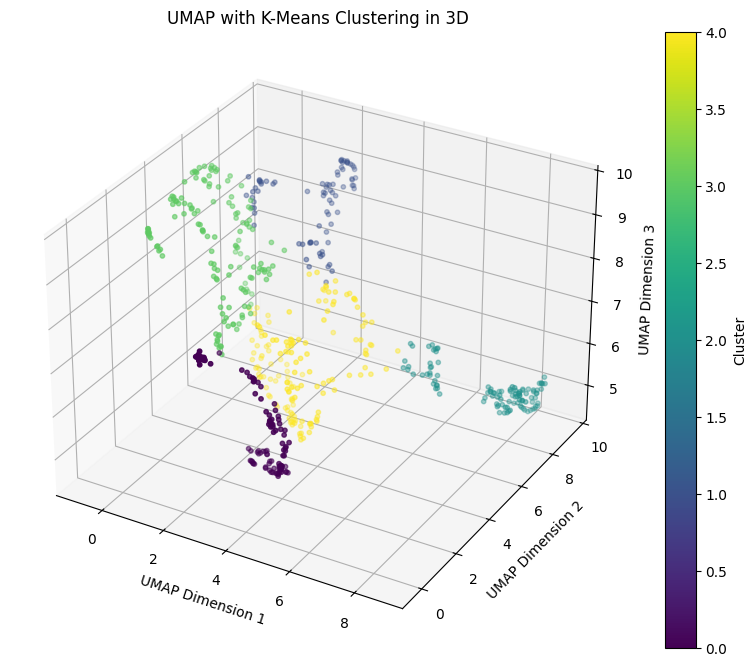

Cluster Analysis (Mean Values):
         Current cigarette use  Current tobacco use  Current alcohol use  \
Cluster                                                                    
0                     0.148835             0.191051             0.318211   
1                     0.034075             0.048545             0.063503   
2                     0.235108             0.251324             0.531579   
3                     0.042387             0.060516             0.071236   
4                     0.185215             0.211006             0.181216   

         Current marijuana use  Fast food eating        Age       Sex  
Cluster                                                                
0                     0.082704          0.723665  14.596154  0.509615  
1                     0.013798          0.323807  14.600000  0.337500  
2                     0.088199          0.285424  14.504673  0.504673  
3                     0.011588          0.546096  14.232877  0.253425  
4  

In [245]:
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = reducer.fit_transform(X_behavioral)  # Use behavioral features only for dimensionality reduction

# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
labels = kmeans.fit_predict(X_umap)
data_pivot["Cluster"] = labels  # Add cluster labels to the DataFrame

# Plot UMAP results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1], X_umap[:, 2], c=labels, cmap="viridis", s=10)
fig.colorbar(scatter, label="Cluster")

# Set axis labels and title
ax.set_title("UMAP with K-Means Clustering in 3D")
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

plt.show()

# Cluster analysis
cluster_analysis = data_pivot.groupby("Cluster")[behavior_features + ["Age", "Sex"]].mean()
print("Cluster Analysis (Mean Values):")
print(cluster_analysis)

# Optional: Cluster size
cluster_sizes = data_pivot["Cluster"].value_counts().sort_index()
print("\nCluster Sizes:")
print(cluster_sizes)


In [246]:
print("\nCluster Information:")
cluster_summary = data_pivot.groupby("Cluster").size().reset_index(name="ClusterSize")
print(cluster_summary)

# Function to display regional makeup of a specified cluster
def display_cluster_region_info(cluster_number):
    print(f"\nRegional Makeup of Cluster {cluster_number}:")
    cluster_points = data_pivot[data_pivot["Cluster"] == cluster_number]
    
    # Group by Region and count the occurrences
    regional_makeup = cluster_points.groupby("Region").size().reset_index(name="RegionCount")
    regional_makeup = regional_makeup.sort_values(by="RegionCount", ascending=False)
    
    print(regional_makeup)


display_cluster_region_info(0)
display_cluster_region_info(1)
display_cluster_region_info(2)
display_cluster_region_info(3)
display_cluster_region_info(4)




Cluster Information:
   Cluster  ClusterSize
0        0          104
1        1           80
2        2          107
3        3          146
4        4          154

Regional Makeup of Cluster 0:
                      Region  RegionCount
2  North America & Caribbean           40
1                  East Asia           31
3                    Oceania           16
0                     Africa           14
5                  West Asia            2
4              South America            1

Regional Makeup of Cluster 1:
          Region  RegionCount
1      East Asia           50
4      West Asia           14
0         Africa           13
2        Oceania            2
3  South America            1

Regional Makeup of Cluster 2:
          Region  RegionCount
2  South America          101
0      East Asia            4
1        Oceania            2

Regional Makeup of Cluster 3:
                      Region  RegionCount
1                  East Asia           87
5                  West Asia    

C:\Users\coope\AppData\Local\Temp\ipykernel_54612\2630847262.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pivot['Fast food category'] = data_pivot['Fast food eating'].apply(categorize_fast_food)
C:\Users\coope\AppData\Local\Temp\ipykernel_54612\2630847262.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pivot['Region_encoded'] = region_encoder.fit_transform(data_pivot['Region'])
C:\Users\coope\AppData\Local\Temp\ipykernel_54612\2630847262.py:31: SettingWithCopyWarning: 
A value is tryi

Classification Report:
              precision    recall  f1-score   support

        High       0.85      0.39      0.54        28
         Low       0.67      0.54      0.60        26
      Medium       0.67      0.88      0.76        65

    accuracy                           0.69       119
   macro avg       0.73      0.60      0.63       119
weighted avg       0.71      0.69      0.67       119


Confusion Matrix:
[[11  1 16]
 [ 0 14 12]
 [ 2  6 57]]

Accuracy Score:
0.6890756302521008


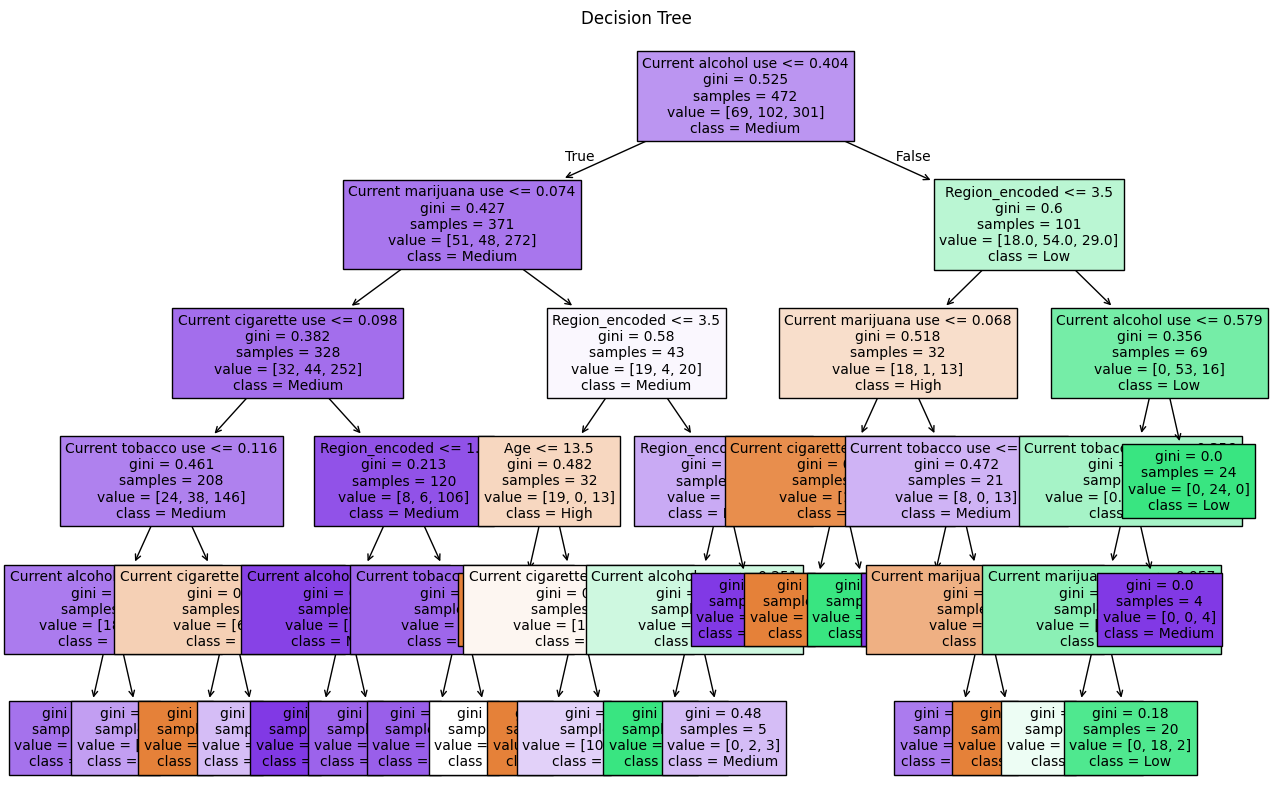

In [247]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree

# Categorize 'Fast food eating' into discrete classes (e.g., low, medium, high)
def categorize_fast_food(value):
    if value < 0.33:
        return 'Low'
    elif value < 0.66:
        return 'Medium'
    else:
        return 'High'

# Categorize the target column
data_pivot['Fast food category'] = data_pivot['Fast food eating'].apply(categorize_fast_food)

# Encode the 'Region' column to numeric values
region_encoder = LabelEncoder()
data_pivot['Region_encoded'] = region_encoder.fit_transform(data_pivot['Region'])

# Features and target
target = 'Fast food category'
features = ["Age", "Sex", "Current cigarette use", "Current tobacco use", "Current alcohol use", "Current marijuana use", "Region_encoded"]

# Encode the target column
label_encoder = LabelEncoder()
data_pivot[target] = label_encoder.fit_transform(data_pivot[target])

# Prepare features (X) and target (y)
X = data_pivot[features]
y = data_pivot[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, fontsize=10)
plt.title("Decision Tree")
plt.show()





